# 데이터 세트 만들기

1. 데이터프레임에서 데이터 세트 만들기
2. ndarray에서 데이터 세트 만들기
3. 교차검증
4. 그리드서치, 랜덤서치를 이용해 최적의 성능을 내는 하이퍼파라미터를 찾기

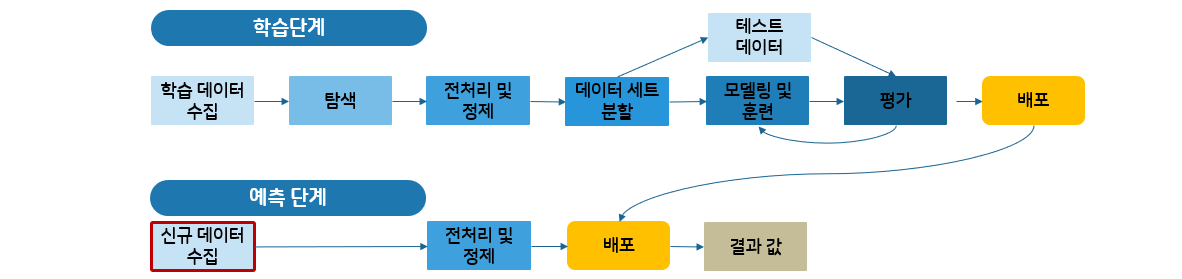

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()

train_data = iris.data
train_label = iris.target

dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)

print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


<div class="alert alert-block">
<font size="3em" style="font-weight:bold;color:#3f8dbf;"></font>
100%정확도? 완벽한 모델인가?<br>
어떤 문제가 있을까요?
</div>  


같은데이터로 예측하고 훈련함.
* 데이터를 분할해 사용해야한다.

## 데이터 프레임에서 분할하기

In [2]:
import pandas as pd

from sklearn.datasets import load_iris
iris = load_iris()

#데이터 프레임 만들기
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df['target']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 데이터 세트 분할

```python
#test_size=0.3 학습용(7) : 테스트용 (3) 으로 분할
#random_state=121 동일한 학습/테스트용 데이터 세트를 생성 위해

X_train, X_test, y_train, y_test = train_test_split(피쳐, 레이블, test_size=0.3, random_state=121 )
```

In [4]:
# label 데이터프레임 슬리이싱

tgt_df = iris_df['target']

tgt_df.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [5]:
# featrue 데이터프레임 슬라이싱
ftr_df=iris_df.drop('target',axis=1)
ftr_df.head(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
from sklearn.model_selection import train_test_split

#학습데이터 세트 X_train, y_train
#테스트 데이터 세트 분할 X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(ftr_df, tgt_df, 
                                                    test_size=0.3, random_state=121)

In [7]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

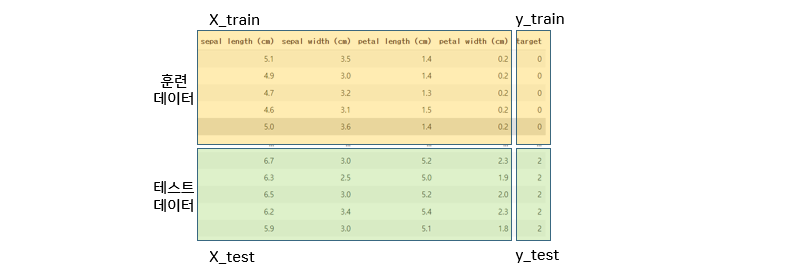

In [8]:
#모델 학습

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier( ) #모델 선정



In [9]:
#모델 훈련
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
#모델 예측

pred = dt_clf.predict(X_test)
pred

array([1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       1])

In [11]:
#모델 평가
from sklearn.metrics import accuracy_score

'예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))

'예측 정확도: 0.9556'

## ndarray 에서 분할하기

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, tgt_df, 
                                                    test_size=0.3, random_state=121)


In [8]:
type(iris_data.data)#분할시  넣는 데이터 타입이 넘파이다.

numpy.ndarray

*        train_test_split(ftr_df, iris_data.target             X_train(DataFrame), X_test(DataFrame)
*                                                              y_train(ndarray)  , y_test(ndarray)
*        train_test_split(iris_data.data, iris_data.target     X_train(ndarray)  , X_test(ndarray)
*                                                              y_train(ndarray)  , y_test(ndarray)
*        train_test_split(iris_data.data, tgt_df               X_train(ndarray)  , X_test(ndarray)
*                                                              y_train(Series)   , y_test(Series)



In [22]:
type(X_train), type(X_test), type(y_train), type(y_test) 

(numpy.ndarray,
 numpy.ndarray,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [23]:
dt_clf = DecisionTreeClassifier( )

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


<div class="alert alert-block">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">기억하세요</font><br>

사이킷런 모델에 사용할 데이터 형태는 ndarray나 데이터프레임/시리즈 형태여야 합니다. <br>
train_test_split()함수를 호출할 시, 매개변수 타입에 맞는 데이터 형태로 전달해야 합니다. <br>
함수가 정의한 타입으로 데이터를 가공할 줄 모르면 시작조차 불가능합니다.  <br>
데이터 형태를 반드시 기억하세요.
</div>  

---

## 교차 검증 (Cross Validation)

* 훈련/테스트 세트를 만드는데 있어, 교차 검증 방식은 거의 필수입니다. 

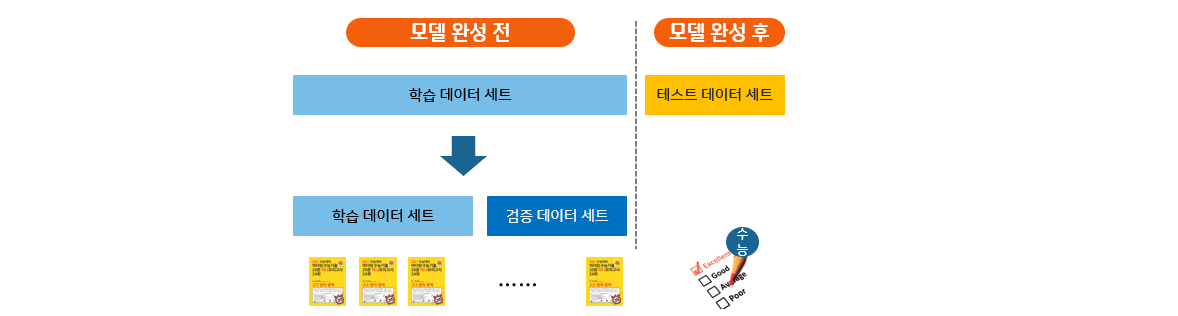

### K폴드 교차검증

* 전체 데이터에서 훈련/테스트 세트를 분할합니다. train_test_split()
* 훈련 세트에서 K개 만큼 분할합니다. 
* K개 중 한개씩 검증용 세트로 사용하고 나머지는 훈련 세트로 사용합니다. 
* K개 중 돌아가며 검증용 세트를 사용하면, 훈련횟수는 K번 이루어진다. 
* K번 훈련 후 K개 결과의 평균을 최종 결과를 낸다.


* K-fold 종류
    * 일반 K-Fold
    * Stratified K-Fold 
        * 불균형한(imbalanced)분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식
        * 학습 데이터와 검증 데이터 세트가 가지는 레이블 분포도가 유사하도록 검증 데이터 추출

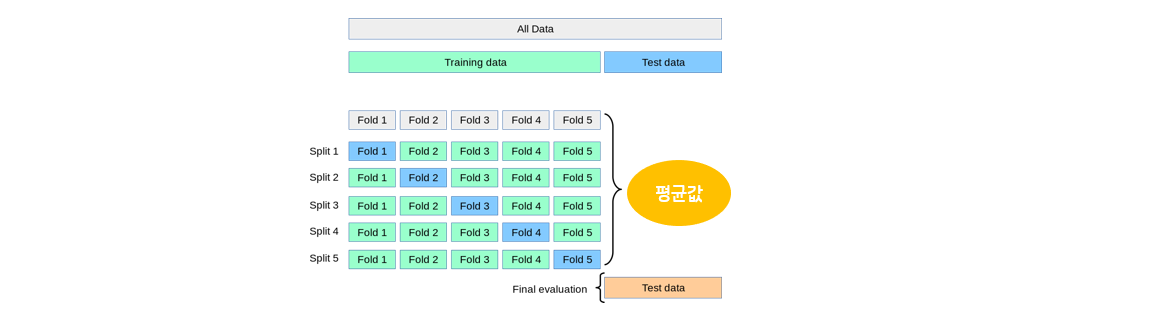

* foid 1 검증용 나머지 훈련 -정확도측정 -> ㅁ
* foid 2 검증용 나머지 훈련 -정확도측정 -> ㅁ
*                                    ---------
*                                    평균값

### KFold()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold 
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: (150, 4)


In [25]:
# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)

splited = kfold.split(features)
splited

#generator : iterator 가 된다.

<generator object _BaseKFold.split at 0x0000022EE6E23F90>

In [26]:
list_data = list(splited)
list_data

#30- 149 훈련1차 129 개

#0 - 29 검증 1차

# ... 총 5번

[(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
          82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
          95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
         108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
         121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27, 

In [27]:
len(list_data) # 5개 fold

5

In [28]:
list_data[0] #0번째 fold, 훈련용: 30~149, 검증용: 0~29

(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

In [32]:
for i, t in kfold.split(features) :
    print (i )
    print(t)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold 
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)

n_iter = 0
cv_accuracy = []

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features): # 5개 (train_index훈련용, test_index검증용)
    
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
   
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
   
    n_iter += 1
   
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)

    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1:.4f}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
'## 평균 검증 정확도:{:.4f}'.format(np.mean(cv_accuracy))  

#'## 평균 검증 정확도:0.9000' 평균값이나옴.


#1 교차 검증 정확도 :1.0000, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


'## 평균 검증 정확도:0.9000'

### cross_val_score()

* 교차검증 자동화

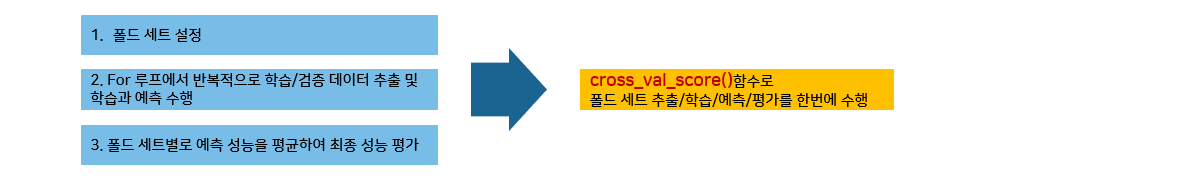

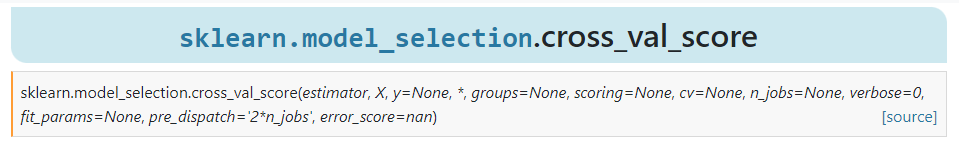

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트(cv)는 5개 
scores = cross_val_score(dt_clf , X_train , y_train , scoring='accuracy', cv=5)
#                                 훈련용    훈련용레이블        정확도      교차검증 5번
print('교차 검증별 정확도:',np.round(scores, 3))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.905 1.    1.    1.    0.905]
평균 검증 정확도: 0.9619


### GridSearchCV() 하이퍼 파라미터 최적합 경우의 수를 찾을떄 , 파라미터까지 교차검증해줌
* 교차 검증과 최적의 하이퍼 파라미터 튜닝을 한 번에 자동화
* 하이퍼 파라미터의 경우의 수만큼 자동 실행

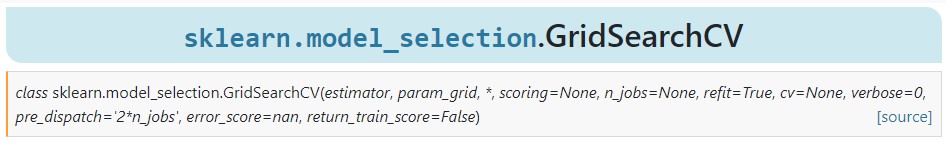

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}# 하이퍼 파라매터의 값을 정해줌.

In [47]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
# refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
#                   알고리즘 /훈련시 사용하는 파라미터 종류/ 훈련3번/ 최적 파라미터로 재학습시킴              
# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)


In [49]:
scores_df.head() # 위에서 123 23으로 조합했던게 1,2 1,3 2,2 2,3 3,2 ,...등으로 자동으로 매칭함. 

#mean_test_score 평균값냄. 

#rank_test_score 자동으로 성능이 좋은 조합을 찾아냄. 1로 나타냄.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.000000,0.000000,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.000409,0.000497,0.000359,0.000508,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.000000,0.000000,0.000000,0.000000,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.000000,0.000000,0.000000,0.000000,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.000000,0.000000,0.001671,0.002363,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1


In [50]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [51]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))# 훈련때 보다는 약간떨어짐.

테스트 데이터 세트 정확도: 0.9667


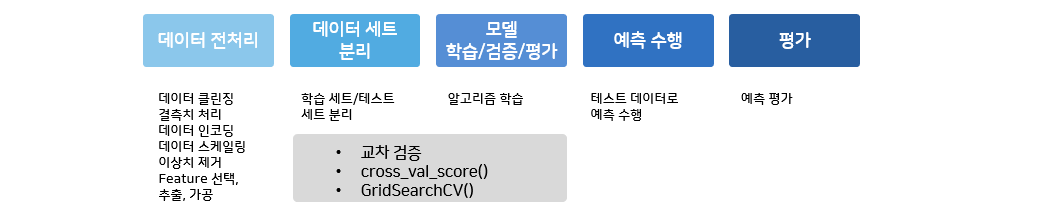